# Práctica Final Individual
Ángel Luis Alonso Blázquez  
NIA - 100363923

## 0-1 Knapsack Problem

## Inicialización de algoritmos

### Imports

In [0]:
import time
import numpy as np
import itertools
import matplotlib.pyplot as plt
import pandas as pd

### Recursive Implementation

In [0]:
# A naive recursive implementation of 0-1 Knapsack Problem 

# Returns the maximum value that can be put in a knapsack of capacity W 
def knapSackR(W, wt, val, n): 

	# Base Case 
	if n == 0 or W == 0 : 
		return 0

	# If weight of the nth item is more than Knapsack of capacity 
	# W, then this item cannot be included in the optimal solution 
	if (wt[n-1] > W): 
		return knapSackR(W, wt, val, n-1) 

	# return the maximum of two cases: 
	# (1) nth item included 
	# (2) not included 
	else: 
		return max(val[n-1] + knapSackR(W-wt[n-1], wt, val, n-1), 
                          knapSackR(W, wt, val, n-1)) 

# This code is contributed by Nikhil Kumar Singh 

**Time Complexity**: O(2^n).  
**Auxiliary Space**: O(1).

### Dynamic Programming Implementation

In [0]:
# A Dynamic Programming based Python 
# Program for 0-1 Knapsack problem 
# Returns the maximum value that can be put in a knapsack of capacity W 
def knapSackDP(W, wt, val, n): 
	K = [[0 for x in range(W + 1)] for x in range(n + 1)] 

	# Build table K[][] in bottom up manner 
	for i in range(n + 1): 
		for w in range(W + 1): 
			if i == 0 or w == 0: 
				K[i][w] = 0
			elif wt[i-1] <= w: 
				K[i][w] = max(val[i-1] + K[i-1][w-wt[i-1]], K[i-1][w]) 
			else: 
				K[i][w] = K[i-1][w] 
		#print(K[i])

	return K[n][W] 

# This code is contributed by Bhavya Jain 

**Time Complexity**: O(NxW).  
**Auxiliary Space**: O(NxW).

### Brute Force Implementation

In [0]:
# Brute Force Python implementation
# For 0-1 Knapsack problem
# Returns maximum value after exploring all posible solutions

def knapSackBF(W, wt, val, n): 
  max_value = 0
  # best_tuple = ()

  # Iterate tuples for all combinations
  '''
  itertools stuff returns an iterator. An iterator is something that you can apply for on. 
  Usually, elements of an iterator is computed as soon as you fetch it, so there is no penalty 
  of copying all the content to memory, unlike a list.
  '''
  for comb_tuple in itertools.chain.from_iterable(itertools.combinations(range(n), i+1) for i in range(n)):
    current_value = 0
    current_weight = 0

    # Iterate for each item in combination
    for j in comb_tuple:
      current_value += val[j]
      current_weight += wt[j]
 
      # Weight restriction
      if current_weight > W:
        current_value = 0
        break

    max_value = max(current_value, max_value)

    '''
    # Tuple return modify (you have to comment the previous line & uncomment 'best_tuple' inicialize)
    if (max_value < current_value):
      max_value = current_value
      best_tuple = comb_tuple

  print("Combination: ")
  print(best_tuple)
    '''

  return max_value

**Time Complexity**: O(2^N).  
**Auxiliary Space**: O(C(n,z)) siendo z=N/2 para N par | z=(N+1)/2 para N impar.

## Pruebas



### Test #0:   
Prueba de buen funcionamiento de las implementaciones. Ejecución de los algoritmos con pequeño tamaño de valores de entrada.

In [0]:
# Driver program to test above function 
val = [60, 100, 120, 200, 110, 150, 280] 
wt = [1, 2, 3, 5, 3, 4, 8] 
W = 12
n = len(val)

# Recursive implementation

start_time = time.time()
result = knapSackRecursive(W, wt, val, n)
time_r = np.around(time.time() - start_time, decimals=5)

print("--- Recursive implementation: ---")
print("Result: %d" % result)
print("Time: %s seconds" % time_r)
print("\n")

# Dynamic Programming implementation

start_time = time.time()
result = knapSackDP(W, wt, val, n)
time_dp = np.around(time.time() - start_time, decimals=5)

print("--- Dynamic Programming implementation: ---")
print("Result: %d" % result) 
print("Time: %s seconds" % time_dp)
print("\n")

# Brute Force implementation

start_time = time.time()
result = knapSackBF(W, wt, val, n)
time_bf = np.around(time.time() - start_time, decimals=5)

print("--- Brute Force implementation: ---")
print("Result: %d" % result)
print("Time: %s seconds" % time_bf)
print("\n")

--- Recursive implementation: ---
Result: 510
Time: 9e-05 seconds


--- Dynamic Programming implementation: ---
Result: 510
Time: 0.00013 seconds


--- Brute Force implementation: ---
Result: 510
Time: 0.00016 seconds




### Resto de tests

#### Inicialización de variables globales  
Inicialización de variables globales para todos los tests que se van a ejecutar a continuación. Esta inicialización global ayuda al mantenimiento del código y a la realización o cambio de pruebas a posteriori.

In [0]:
total_tests_t1 = 1
total_tests_t2 = 1

# r = recursive | rw = recursive worst case | dp = dynamic programming | bf = brute force
times_r_t1 = []
times_r_t2 = []
times_rw = []
times_dp_t1 = []
times_dp_t2 = []
times_bf_t1 = []
times_bf_t2 = []

lowest_test = 8
highest_test_t1 = 350
highest_test_t2 = 150
highest_test_bf = 30
highest_test_rw = 30

val = np.random.randint(10,1001,highest_test_t1+1)
wt = np.random.randint(10,101,highest_test_t1+1)
wt_rw = [1]*(highest_test_rw+1)
W_t1 = np.random.randint(20,51)
W_t2 = np.random.randint(50,101)
W_rw = highest_test_rw

#### Test #1: 

##### Ejecución de todos los algoritmos

###### Recursive implementation

In [0]:
for test_number in range(total_tests_t1):

  # Inicialize test conditions

  test_time_r = []

  print("------ Test %d ------" % test_number)
  print("\n")
  print("Test conditions:")
  print("  limit weight - %d" % W_t1)
  print("  values - ")
  print(val)
  print("  weights - ")
  print(wt)
  print("\n")

  # Tests

  for n in range(lowest_test, highest_test_t1 + 1):
    iter_time = time.time()
    print("Items: %d" % n)

    # Recursive implementation

    start_time = time.time()
    result = knapSackR(W_t1, wt, val, n)
    test_time_r.append(np.around(time.time() - start_time, decimals=5))

    print("--- Recursive implementation: ---")
    print("Result: %d" % result)
    print("Time: %s seconds" % test_time_r[n-lowest_test])
    print("\n")

    # print("Iteration time: %s seconds\n" % np.around(time.time() - iter_time, decimals=5))

  # Time of test results

  print(" - - Recursive implementation's iteration times - - ")
  print(test_time_r)
  print("\n")

  # Save data
  
  times_r_t1.append(test_time_r)

------ Test 0 ------


Test conditions:
  limit weight - 12
  values - 
[ 658  905  576  320  247  754  285  263  954  740  308  477  419  849
  676  647  606  758  237  343  160  302  708   77  131  784  932  340
  803  733  200  237  720  861  598  279 1000  418  338  135  247  728
  788  298  106  309  674  229  556  279  321  569  101  890  365  144
  559   14  397  264  547  595  899  742   66  798  620  818  416  505
  904  161  249  577  942  567  845  112   96  363  123  146  467  477
  981  369  147  298  288  725  999  823  216  972  269  944  255  447
  736  926  585  132   73  204  795  208  250  648  230  134  496  144
  518  487  995  125  262  738  317  227  583  440  829  471  348  790
   78  114  810  873   16  227  183  738  528   21   31  795  796  765
  858  177  389  348  719  854  551  457   77   45  329  303  366  765
  566  315  670  659  989  279  278  482  957  456  714  656  120  393
  570  962  538  147  178  317  578  621  835  823  747  675  229  796
   38

###### Recursive implementation (worst case)

In [0]:
for test_number in range(total_tests_t1):

  # Inicialize test conditions

  test_time_rw = []

  print("------ Test %d ------" % test_number)
  print("\n")
  print("Test conditions:")
  print("  limit weight - %d" % W_t1)
  print("  values - ")
  print(val)
  print("  weights - ")
  print(wt_rw)
  print("\n")

  # Tests

  for n in range(lowest_test, highest_test_rw + 1):
    iter_time = time.time()
    print("Items: %d" % n)

    # Recursive implementation (worst case)

    start_time = time.time()
    result = knapSackR(W_rw, wt_rw, val, n)
    test_time_rw.append(np.around(time.time() - start_time, decimals=5))

    print("--- Recursive implementation (worst case): ---")
    print("Result: %d" % result)
    print("Time: %s seconds" % test_time_rw[n-lowest_test])
    print("\n")

    # print("Iteration time: %s seconds\n" % np.around(time.time() - iter_time, decimals=5))

  # Time of test results

  print(" - - Recursive implementation's (worst case) iteration times - - ")
  print(test_time_rw)
  print("\n")

  # Save data
  
  times_rw.append(test_time_rw)

------ Test 0 ------


Test conditions:
  limit weight - 12
  values - 
[ 658  905  576  320  247  754  285  263  954  740  308  477  419  849
  676  647  606  758  237  343  160  302  708   77  131  784  932  340
  803  733  200  237  720  861  598  279 1000  418  338  135  247  728
  788  298  106  309  674  229  556  279  321  569  101  890  365  144
  559   14  397  264  547  595  899  742   66  798  620  818  416  505
  904  161  249  577  942  567  845  112   96  363  123  146  467  477
  981  369  147  298  288  725  999  823  216  972  269  944  255  447
  736  926  585  132   73  204  795  208  250  648  230  134  496  144
  518  487  995  125  262  738  317  227  583  440  829  471  348  790
   78  114  810  873   16  227  183  738  528   21   31  795  796  765
  858  177  389  348  719  854  551  457   77   45  329  303  366  765
  566  315  670  659  989  279  278  482  957  456  714  656  120  393
  570  962  538  147  178  317  578  621  835  823  747  675  229  796
   38

###### Dynamic programming implementation

In [0]:
for test_number in range(total_tests_t1):

  # Inicialize test conditions

  test_time_dp = []

  print("------ Test %d ------" % test_number)
  print("\n")
  print("Test conditions:")
  print("  limit weight - %d" % W_t1)
  print("  values - ")
  print(val)
  print("  weights - ")
  print(wt)
  print("\n")

  # Tests

  for n in range(lowest_test, highest_test_t1 + 1):
    iter_time = time.time()
    print("Items: %d" % n)

    # Dynamic programming implementation

    start_time = time.time()
    result = knapSackDP(W_t1, wt, val, n)
    test_time_dp.append(np.around(time.time() - start_time, decimals=5))

    print("--- Dynamic programming implementation: ---")
    print("Result: %d" % result)
    print("Time: %s seconds" % test_time_dp[n-lowest_test])
    print("\n")

    # print("Iteration time: %s seconds\n" % np.around(time.time() - iter_time, decimals=5))

  # Time of test results

  print(" - - Dynamic programming's iteration times - - ")
  print(test_time_dp)
  print("\n")

  # Save data
  
  times_dp_t1.append(test_time_dp)

------ Test 0 ------


Test conditions:
  limit weight - 12
  values - 
[ 658  905  576  320  247  754  285  263  954  740  308  477  419  849
  676  647  606  758  237  343  160  302  708   77  131  784  932  340
  803  733  200  237  720  861  598  279 1000  418  338  135  247  728
  788  298  106  309  674  229  556  279  321  569  101  890  365  144
  559   14  397  264  547  595  899  742   66  798  620  818  416  505
  904  161  249  577  942  567  845  112   96  363  123  146  467  477
  981  369  147  298  288  725  999  823  216  972  269  944  255  447
  736  926  585  132   73  204  795  208  250  648  230  134  496  144
  518  487  995  125  262  738  317  227  583  440  829  471  348  790
   78  114  810  873   16  227  183  738  528   21   31  795  796  765
  858  177  389  348  719  854  551  457   77   45  329  303  366  765
  566  315  670  659  989  279  278  482  957  456  714  656  120  393
  570  962  538  147  178  317  578  621  835  823  747  675  229  796
   38

###### Brute Force implementation

In [0]:
for test_number in range(total_tests_t1):

  # Inicialize test conditions

  test_time_bf = []

  print("------ Test %d ------" % test_number)
  print("\n")
  print("Test conditions:")
  print("  limit weight - %d" % W_t1)
  print("  values - ")
  print(val)
  print("  weights - ")
  print(wt)
  print("\n")

  # Tests

  for n in range(lowest_test, highest_test_bf + 1):
    iter_time = time.time()
    print("Items: %d" % n)

    # Recursive implementation (worst case)

    start_time = time.time()
    result = knapSackBF(W_t1, wt, val, n)
    test_time_bf.append(np.around(time.time() - start_time, decimals=5))

    print("--- Brute Force (worst case): ---")
    print("Result: %d" % result)
    print("Time: %s seconds" % test_time_bf[n-lowest_test])
    print("\n")

    # print("Iteration time: %s seconds\n" % np.around(time.time() - iter_time, decimals=5))

  # Time of test results

  print(" - - Brute Force's iteration times - - ")
  print(test_time_bf)
  print("\n")

  # Save data
  
  times_bf_t1.append(test_time_bf)

------ Test 0 ------


Test conditions:
  limit weight - 12
  values - 
[ 658  905  576  320  247  754  285  263  954  740  308  477  419  849
  676  647  606  758  237  343  160  302  708   77  131  784  932  340
  803  733  200  237  720  861  598  279 1000  418  338  135  247  728
  788  298  106  309  674  229  556  279  321  569  101  890  365  144
  559   14  397  264  547  595  899  742   66  798  620  818  416  505
  904  161  249  577  942  567  845  112   96  363  123  146  467  477
  981  369  147  298  288  725  999  823  216  972  269  944  255  447
  736  926  585  132   73  204  795  208  250  648  230  134  496  144
  518  487  995  125  262  738  317  227  583  440  829  471  348  790
   78  114  810  873   16  227  183  738  528   21   31  795  796  765
  858  177  389  348  719  854  551  457   77   45  329  303  366  765
  566  315  670  659  989  279  278  482  957  456  714  656  120  393
  570  962  538  147  178  317  578  621  835  823  747  675  229  796
   38

##### Post-procesado de datos

In [0]:
# Process data

times_r_t1 = np.asarray(times_r_t1)
times_rw = np.asarray(times_rw)
times_dp_t1 = np.asarray(times_dp_t1)
times_bf_t1 = np.asarray(times_bf_t1)

times_r_t1_average = np.true_divide(np.sum(times_r_t1, 0), total_tests_t1)
times_rw_average = np.true_divide(np.sum(times_rw, 0), total_tests_t1)
times_dp_t1_average = np.true_divide(np.sum(times_dp_t1, 0), total_tests_t1)
times_bf_t1_average = np.true_divide(np.sum(times_bf_t1, 0), total_tests_t1)

first_inflection_point_t1 = min(highest_test_bf, highest_test_rw)

##### Gráficos

Text(0, 0.5, 'Time (seconds)')

<Figure size 432x288 with 0 Axes>

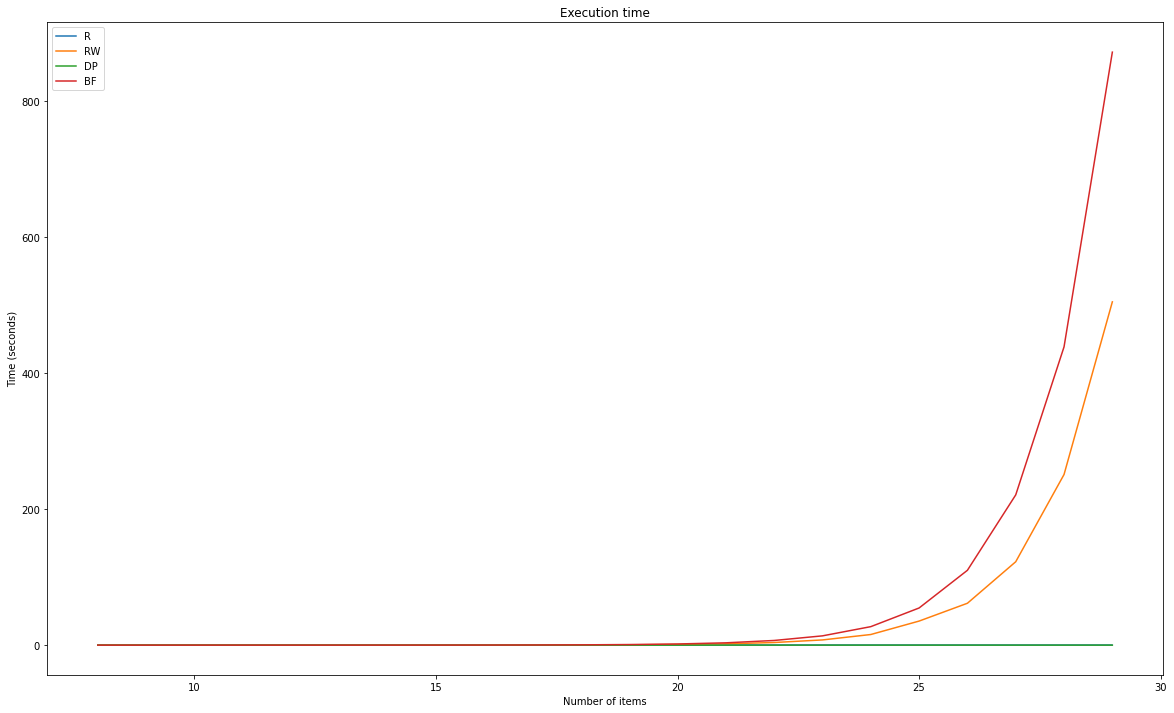

In [0]:
# Plots

df_t1_small = pd.DataFrame({
                        'R': times_r_t1_average[:first_inflection_point_t1-lowest_test],
                        'RW': times_rw_average[:first_inflection_point_t1-lowest_test],
                        'DP': times_dp_t1_average[:first_inflection_point_t1-lowest_test],
                        'BF': times_bf_t1_average[:first_inflection_point_t1-lowest_test]
                      }, index = range(lowest_test, first_inflection_point_t1))

plt.figure()
df_t1_small.plot(figsize=(20,12))
plt.title("Execution time")
plt.xlabel('Number of items')
plt.ylabel('Time (seconds)')

Text(0, 0.5, 'Time (seconds)')

<Figure size 432x288 with 0 Axes>

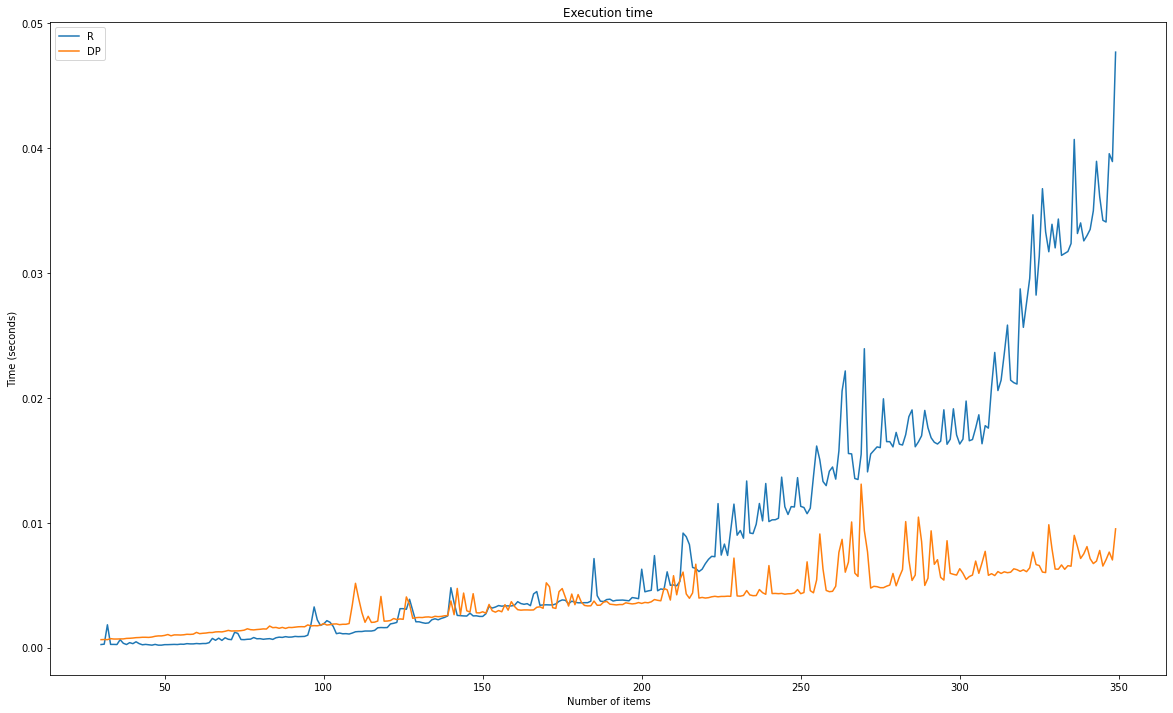

In [0]:
# Plots

df_t1_big = pd.DataFrame({
                        'R': times_r_t1_average[first_inflection_point_t1-lowest_test:highest_test_t1-lowest_test],
                        'DP': times_dp_t1_average[first_inflection_point_t1-lowest_test:highest_test_t1-lowest_test]
                      }, index = range(first_inflection_point_t1, highest_test_t1))

plt.figure()
df_t1_big.plot(figsize=(20,12))
plt.title("Execution time")
plt.xlabel('Number of items')
plt.ylabel('Time (seconds)')

#### Test #2: 

En este test se aumenta el valor de peso límite de la mochila (W).  
Pasa de **20-50** a **50-100**.

##### Ejecución de todos los algoritmos

###### Recursive implementation

In [0]:
for test_number in range(total_tests_t2):

  # Inicialize test conditions

  test_time_r = []

  print("------ Test %d ------" % test_number)
  print("\n")
  print("Test conditions:")
  print("  limit weight - %d" % W_t2)
  print("  values - ")
  print(val)
  print("  weights - ")
  print(wt)
  print("\n")

  # Tests

  for n in range(lowest_test, highest_test_t2 + 1):
    iter_time = time.time()
    print("Items: %d" % n)

    # Recursive implementation

    start_time = time.time()
    result = knapSackR(W_t2, wt, val, n)
    test_time_r.append(np.around(time.time() - start_time, decimals=5))

    print("--- Recursive implementation: ---")
    print("Result: %d" % result)
    print("Time: %s seconds" % test_time_r[n-lowest_test])
    print("\n")

    # print("Iteration time: %s seconds\n" % np.around(time.time() - iter_time, decimals=5))

  # Time of test results

  print(" - - Recursive implementation's iteration times - - ")
  print(test_time_r)
  print("\n")

  # Save data
  
  times_r_t2.append(test_time_r)

------ Test 0 ------


Test conditions:
  limit weight - 12
  values - 
[ 658  905  576  320  247  754  285  263  954  740  308  477  419  849
  676  647  606  758  237  343  160  302  708   77  131  784  932  340
  803  733  200  237  720  861  598  279 1000  418  338  135  247  728
  788  298  106  309  674  229  556  279  321  569  101  890  365  144
  559   14  397  264  547  595  899  742   66  798  620  818  416  505
  904  161  249  577  942  567  845  112   96  363  123  146  467  477
  981  369  147  298  288  725  999  823  216  972  269  944  255  447
  736  926  585  132   73  204  795  208  250  648  230  134  496  144
  518  487  995  125  262  738  317  227  583  440  829  471  348  790
   78  114  810  873   16  227  183  738  528   21   31  795  796  765
  858  177  389  348  719  854  551  457   77   45  329  303  366  765
  566  315  670  659  989  279  278  482  957  456  714  656  120  393
  570  962  538  147  178  317  578  621  835  823  747  675  229  796
   38

###### Dynamic programming implementation

In [0]:
for test_number in range(total_tests_t2):

  # Inicialize test conditions

  test_time_dp = []

  print("------ Test %d ------" % test_number)
  print("\n")
  print("Test conditions:")
  print("  limit weight - %d" % W_t2)
  print("  values - ")
  print(val)
  print("  weights - ")
  print(wt)
  print("\n")

  # Tests

  for n in range(lowest_test, highest_test_t2 + 1):
    iter_time = time.time()
    print("Items: %d" % n)

    # Dynamic programming implementation

    start_time = time.time()
    result = knapSackDP(W_t2, wt, val, n)
    test_time_dp.append(np.around(time.time() - start_time, decimals=5))

    print("--- Dynamic programming implementation: ---")
    print("Result: %d" % result)
    print("Time: %s seconds" % test_time_dp[n-lowest_test])
    print("\n")

    # print("Iteration time: %s seconds\n" % np.around(time.time() - iter_time, decimals=5))

  # Time of test results

  print(" - - Dynamic programming's iteration times - - ")
  print(test_time_dp)
  print("\n")

  # Save data
  
  times_dp_t2.append(test_time_dp)

------ Test 0 ------


Test conditions:
  limit weight - 12
  values - 
[ 658  905  576  320  247  754  285  263  954  740  308  477  419  849
  676  647  606  758  237  343  160  302  708   77  131  784  932  340
  803  733  200  237  720  861  598  279 1000  418  338  135  247  728
  788  298  106  309  674  229  556  279  321  569  101  890  365  144
  559   14  397  264  547  595  899  742   66  798  620  818  416  505
  904  161  249  577  942  567  845  112   96  363  123  146  467  477
  981  369  147  298  288  725  999  823  216  972  269  944  255  447
  736  926  585  132   73  204  795  208  250  648  230  134  496  144
  518  487  995  125  262  738  317  227  583  440  829  471  348  790
   78  114  810  873   16  227  183  738  528   21   31  795  796  765
  858  177  389  348  719  854  551  457   77   45  329  303  366  765
  566  315  670  659  989  279  278  482  957  456  714  656  120  393
  570  962  538  147  178  317  578  621  835  823  747  675  229  796
   38

###### Brute Force implementation

In [0]:
for test_number in range(total_tests_t2):

  # Inicialize test conditions

  test_time_bf = []

  print("------ Test %d ------" % test_number)
  print("\n")
  print("Test conditions:")
  print("  limit weight - %d" % W_t2)
  print("  values - ")
  print(val)
  print("  weights - ")
  print(wt)
  print("\n")

  # Tests

  for n in range(lowest_test, highest_test_bf + 1):
    iter_time = time.time()
    print("Items: %d" % n)

    # Recursive implementation (worst case)

    start_time = time.time()
    result = knapSackBF(W_t2, wt, val, n)
    test_time_bf.append(np.around(time.time() - start_time, decimals=5))

    print("--- Brute Force (worst case): ---")
    print("Result: %d" % result)
    print("Time: %s seconds" % test_time_bf[n-lowest_test])
    print("\n")

    # print("Iteration time: %s seconds\n" % np.around(time.time() - iter_time, decimals=5))

  # Time of test results

  print(" - - Brute Force's iteration times - - ")
  print(test_time_bf)
  print("\n")

  # Save data
  
  times_bf_t2.append(test_time_bf)

------ Test 0 ------


Test conditions:
  limit weight - 12
  values - 
[ 658  905  576  320  247  754  285  263  954  740  308  477  419  849
  676  647  606  758  237  343  160  302  708   77  131  784  932  340
  803  733  200  237  720  861  598  279 1000  418  338  135  247  728
  788  298  106  309  674  229  556  279  321  569  101  890  365  144
  559   14  397  264  547  595  899  742   66  798  620  818  416  505
  904  161  249  577  942  567  845  112   96  363  123  146  467  477
  981  369  147  298  288  725  999  823  216  972  269  944  255  447
  736  926  585  132   73  204  795  208  250  648  230  134  496  144
  518  487  995  125  262  738  317  227  583  440  829  471  348  790
   78  114  810  873   16  227  183  738  528   21   31  795  796  765
  858  177  389  348  719  854  551  457   77   45  329  303  366  765
  566  315  670  659  989  279  278  482  957  456  714  656  120  393
  570  962  538  147  178  317  578  621  835  823  747  675  229  796
   38

##### Post-procesado de datos

In [0]:
# Process data

times_r_t2 = np.asarray(times_r_t2)
times_rw = np.asarray(times_rw)
times_dp_t2 = np.asarray(times_dp_t2)
times_bf_t2 = np.asarray(times_bf_t2)

times_r_t2_average = np.true_divide(np.sum(times_r_t2, 0), total_tests_t2)
times_rw_average = np.true_divide(np.sum(times_rw, 0), total_tests_t2)
times_dp_t2_average = np.true_divide(np.sum(times_dp_t2, 0), total_tests_t2)
times_bf_t2_average = np.true_divide(np.sum(times_bf_t2, 0), total_tests_t2)

first_inflection_point_t2 = min(highest_test_bf, highest_test_rw)

##### Gráficos

Text(0, 0.5, 'Time (seconds)')

<Figure size 432x288 with 0 Axes>

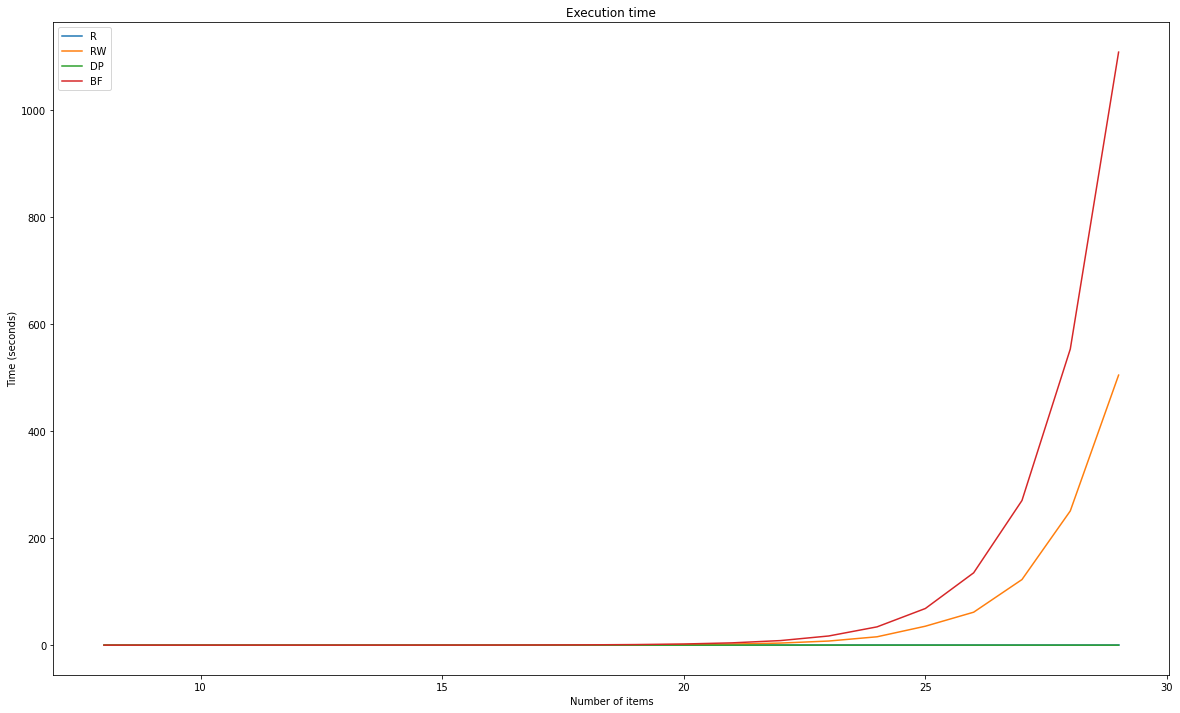

In [0]:
# Plots

df_t2_small = pd.DataFrame({
                        'R': times_r_t2_average[:first_inflection_point_t2-lowest_test],
                        'RW': times_rw_average[:first_inflection_point_t2-lowest_test],
                        'DP': times_dp_t2_average[:first_inflection_point_t2-lowest_test],
                        'BF': times_bf_t2_average[:first_inflection_point_t2-lowest_test]
                      }, index = range(lowest_test, first_inflection_point_t2))

plt.figure()
df_t2_small.plot(figsize=(20,12))
plt.title("Execution time")
plt.xlabel('Number of items')
plt.ylabel('Time (seconds)')

Text(0, 0.5, 'Time (seconds)')

<Figure size 432x288 with 0 Axes>

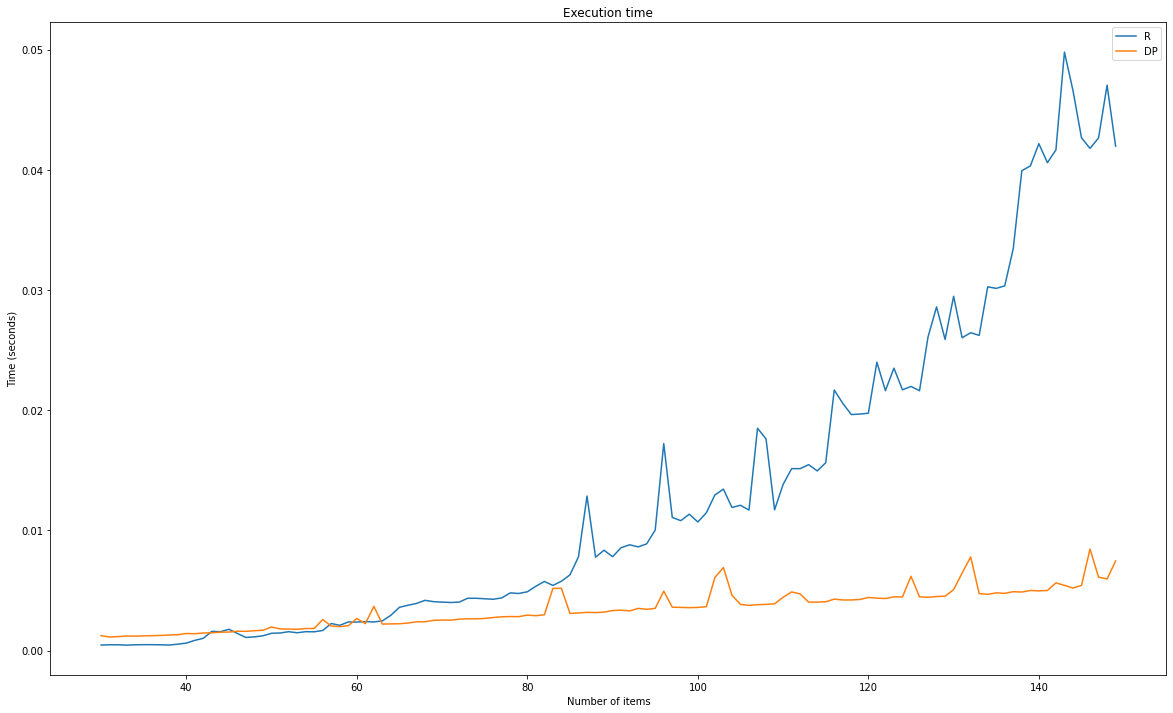

In [0]:
# Plots

df_t2_big = pd.DataFrame({
                        'R': times_r_t2_average[first_inflection_point_t2-lowest_test:highest_test_t2-lowest_test],
                        'DP': times_dp_t2_average[first_inflection_point_t2-lowest_test:highest_test_t2-lowest_test]
                      }, index = range(first_inflection_point_t2, highest_test_t2))

plt.figure()
df_t2_big.plot(figsize=(20,12))
plt.title("Execution time")
plt.xlabel('Number of items')
plt.ylabel('Time (seconds)')

#### Comparación de tests

Text(0, 0.5, 'Time (seconds)')

<Figure size 432x288 with 0 Axes>

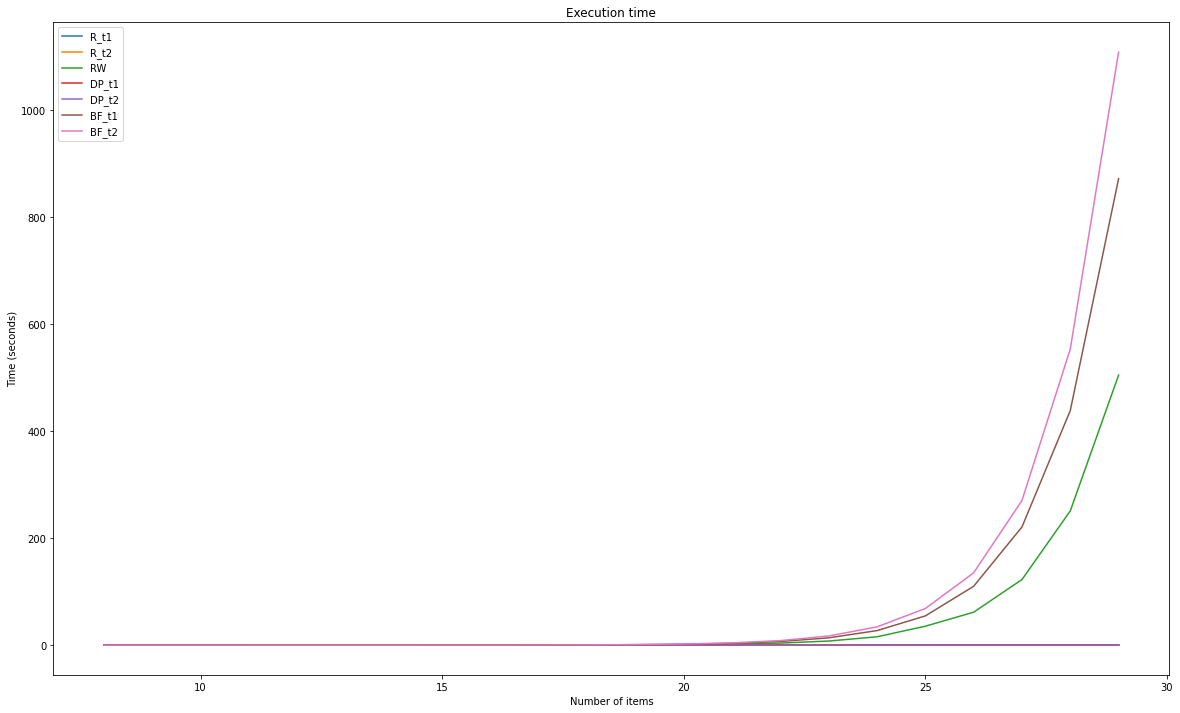

In [0]:
first_inflection_point = min(first_inflection_point_t1, first_inflection_point_t2)
second_inflection_point = min(highest_test_t1, highest_test_t2)

df_total_small = pd.DataFrame({
                        'R_t1': times_r_t1_average[:first_inflection_point-lowest_test],
                        'R_t2': times_r_t2_average[:first_inflection_point-lowest_test],
                        'RW': times_rw_average[:first_inflection_point-lowest_test],
                        'DP_t1': times_dp_t1_average[:first_inflection_point-lowest_test],
                        'DP_t2': times_dp_t2_average[:first_inflection_point-lowest_test],
                        'BF_t1': times_bf_t1_average[:first_inflection_point-lowest_test],
                        'BF_t2': times_bf_t2_average[:first_inflection_point-lowest_test]
                      }, index = range(lowest_test, first_inflection_point))

plt.figure()
df_total_small.plot(figsize=(20,12))
plt.title("Execution time")
plt.xlabel('Number of items')
plt.ylabel('Time (seconds)')

Text(0, 0.5, 'Time (seconds)')

<Figure size 432x288 with 0 Axes>

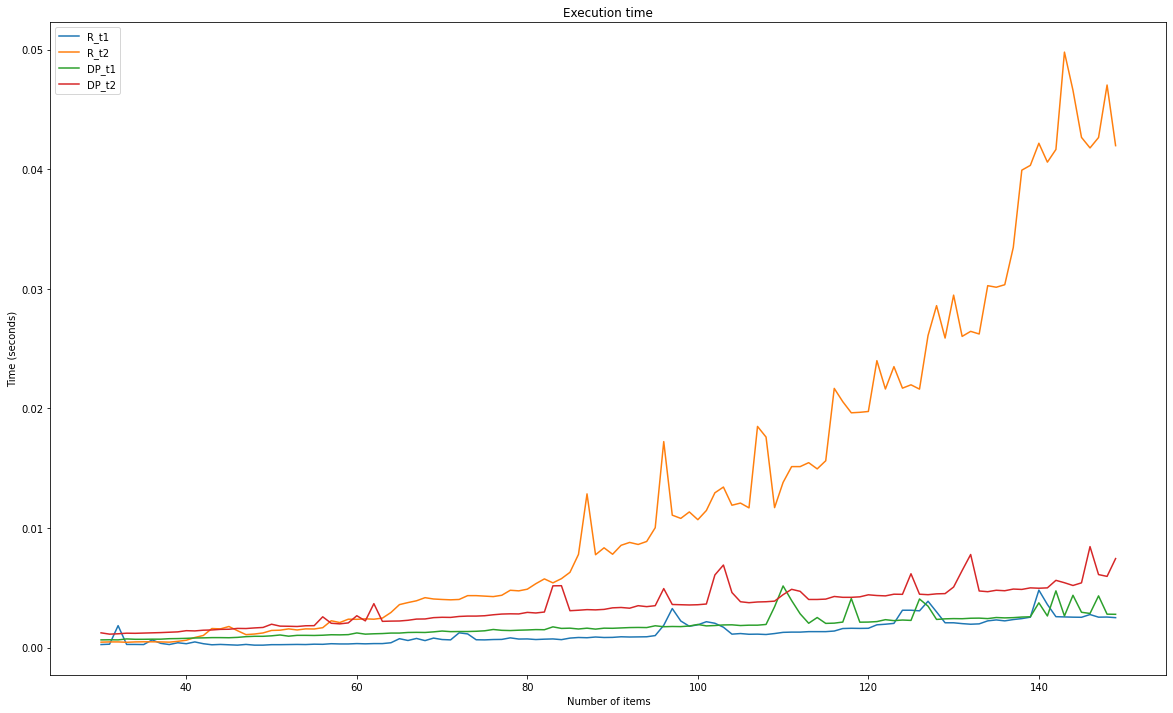

In [0]:
df_total_big = pd.DataFrame({
                        'R_t1': times_r_t1_average[first_inflection_point-lowest_test:second_inflection_point-lowest_test],
                        'R_t2': times_r_t2_average[first_inflection_point-lowest_test:second_inflection_point-lowest_test],
                        'DP_t1': times_dp_t1_average[first_inflection_point-lowest_test:second_inflection_point-lowest_test],
                        'DP_t2': times_dp_t2_average[first_inflection_point-lowest_test:second_inflection_point-lowest_test]
                      }, index = range(first_inflection_point, second_inflection_point))

plt.figure()
df_total_big.plot(figsize=(20,12))
plt.title("Execution time")
plt.xlabel('Number of items')
plt.ylabel('Time (seconds)')

#### Exportar datos

In [0]:
print(times_r_t1_average)
print(times_r_t2_average)
print(times_rw_average)
print(times_dp_t1_average)
print(times_dp_t2_average)
print(times_bf_t1_average)
print(times_bf_t2_average)

[3.000e-05 3.000e-05 3.000e-05 3.000e-05 5.000e-05 5.000e-05 6.000e-05
 5.000e-05 5.000e-05 5.000e-05 5.000e-05 5.000e-05 7.000e-05 1.100e-04
 1.200e-04 1.100e-04 1.600e-04 1.800e-04 2.400e-04 2.500e-04 2.300e-04
 2.600e-04 2.600e-04 2.900e-04 1.840e-03 2.700e-04 2.700e-04 2.600e-04
 6.500e-04 3.600e-04 2.600e-04 4.100e-04 3.300e-04 4.800e-04 3.300e-04
 2.400e-04 2.700e-04 2.400e-04 2.100e-04 2.700e-04 2.100e-04 2.100e-04
 2.500e-04 2.500e-04 2.600e-04 2.700e-04 2.600e-04 2.900e-04 2.800e-04
 3.300e-04 3.100e-04 3.100e-04 3.400e-04 3.200e-04 3.400e-04 3.400e-04
 4.100e-04 7.500e-04 6.000e-04 7.700e-04 5.900e-04 8.000e-04 6.800e-04
 6.500e-04 1.240e-03 1.150e-03 6.600e-04 6.500e-04 6.800e-04 6.900e-04
 8.200e-04 7.200e-04 7.300e-04 6.800e-04 7.100e-04 7.300e-04 6.700e-04
 8.000e-04 8.500e-04 8.300e-04 8.900e-04 8.500e-04 8.600e-04 9.100e-04
 8.900e-04 9.000e-04 9.100e-04 1.010e-03 1.870e-03 3.270e-03 2.230e-03
 1.790e-03 1.910e-03 2.170e-03 2.040e-03 1.710e-03 1.130e-03 1.180e-03
 1.120

In [0]:
df_export_r_350 = pd.DataFrame({
                        'R_t1': times_r_t1_average
                      }, index = range(lowest_test, highest_test_t1+1))

df_export_r_150 = pd.DataFrame({
                        'R_t2': times_r_t2_average
                      }, index = range(lowest_test, highest_test_t2+1))

df_export_rw = pd.DataFrame({
                        'RW': times_rw_average
                      }, index = range(lowest_test, highest_test_rw+1))

df_export_dp_350 = pd.DataFrame({
                        'DP_t1': times_dp_t1_average
                      }, index = range(lowest_test, highest_test_t1+1))

df_export_dp_150 = pd.DataFrame({
                        'DP_t2': times_dp_t2_average
                      }, index = range(lowest_test, highest_test_t2+1))

df_export_bf = pd.DataFrame({
                        'BF_t1': times_bf_t1_average,
                        'BF_t2': times_bf_t2_average
                      }, index = range(lowest_test, highest_test_bf+1))

# Export data

df_export_r_350.to_csv('r_350.csv')
df_export_r_150.to_csv('r_150.csv')
df_export_rw.to_csv('rw.csv')
df_export_dp_350.to_csv('dp_350.csv')
df_export_dp_150.to_csv('dp_150.csv')
df_export_bf.to_csv('bf.csv')

### Test #3  
Desarrollo del caso recursivo para estudiar su comportamiento.

#### Ejecución del algoritmo

In [11]:
total_tests_t3 = 1
times_r_t3 = []
lowest_test = 8
highest_test_t3 = 900

val = np.random.randint(10,1001,highest_test_t3+1)
wt = np.random.randint(10,101,highest_test_t3+1)
W_t3 = np.random.randint(20,51)

for test_number in range(total_tests_t3):

  # Inicialize test conditions

  test_time_r = []

  print("------ Test %d ------" % test_number)
  print("\n")
  print("Test conditions:")
  print("  limit weight - %d" % W_t3)
  print("  values - ")
  print(val)
  print("  weights - ")
  print(wt)
  print("\n")

  # Tests

  for n in range(lowest_test, highest_test_t3 + 1):
    iter_time = time.time()
    print("Items: %d" % n)

    # Recursive implementation

    start_time = time.time()
    result = knapSackR(W_t3, wt, val, n)
    test_time_r.append(np.around(time.time() - start_time, decimals=5))

    print("--- Recursive implementation: ---")
    print("Result: %d" % result)
    print("Time: %s seconds" % test_time_r[n-lowest_test])
    print("\n")

    # print("Iteration time: %s seconds\n" % np.around(time.time() - iter_time, decimals=5))

  # Time of test results

  print(" - - Recursive implementation's iteration times - - ")
  print(test_time_r)
  print("\n")

  # Save data
  
  times_r_t3.append(test_time_r)

Se han truncado las últimas 5000 líneas del flujo de salida.
Time: 0.00144 seconds


Items: 69
--- Recursive implementation: ---
Result: 2453
Time: 0.00146 seconds


Items: 70
--- Recursive implementation: ---
Result: 2453
Time: 0.00172 seconds


Items: 71
--- Recursive implementation: ---
Result: 2453
Time: 0.00172 seconds


Items: 72
--- Recursive implementation: ---
Result: 2453
Time: 0.0018 seconds


Items: 73
--- Recursive implementation: ---
Result: 2453
Time: 0.00172 seconds


Items: 74
--- Recursive implementation: ---
Result: 2453
Time: 0.00171 seconds


Items: 75
--- Recursive implementation: ---
Result: 2584
Time: 0.00268 seconds


Items: 76
--- Recursive implementation: ---
Result: 2584
Time: 0.00249 seconds


Items: 77
--- Recursive implementation: ---
Result: 2584
Time: 0.0025 seconds


Items: 78
--- Recursive implementation: ---
Result: 2584
Time: 0.00255 seconds


Items: 79
--- Recursive implementation: ---
Result: 2584
Time: 0.00279 seconds


Items: 80
--- Recursive im

#### Post-procesado

In [0]:
# Process data

times_r_t3 = np.asarray(times_r_t3)

times_r_t3_average = np.true_divide(np.sum(times_r_t3, 0), total_tests_t3)

#### Gráfico

Text(0, 0.5, 'Time (seconds)')

<Figure size 432x288 with 0 Axes>

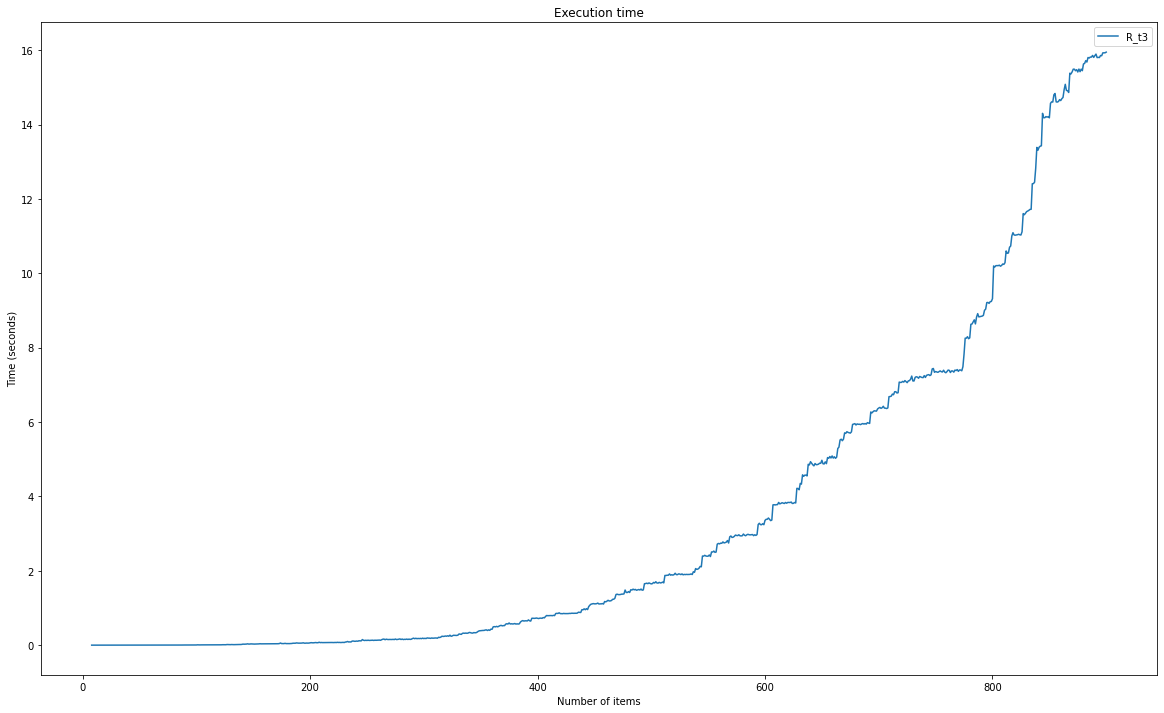

In [13]:
# Plot

df_r_900 = pd.DataFrame({
                        'R_t3': times_r_t3_average
                      }, index = range(lowest_test, highest_test_t3+1))

plt.figure()
df_r_900.plot(figsize=(20,12))
plt.title("Execution time")
plt.xlabel('Number of items')
plt.ylabel('Time (seconds)')

#### Exportar datos

In [0]:
# Export data 

df_r_900.to_csv('r_900.csv')